# Principal Component Analysis (PCA)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data_pre_pca = pd.read_csv("Clustering_Data_Final.csv")
data_pre_pca = data_pre_pca.drop(columns=['Division','Date'])
data_pre_pca

,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
0,30.6,0.87,1.42,1.37,0.04,0.85,0.0,1066.0,4.410000,37.661290
1,29.8,0.62,1.48,0.40,0.47,0.94,0.0,986.0,6.533333,38.428571
2,37.3,1.57,1.94,1.13,1.11,1.09,0.0,859.0,6.712903,44.290323
3,49.3,0.70,1.20,-0.79,0.37,0.50,0.0,471.0,3.613333,45.783333
4,52.3,2.49,1.63,0.54,0.73,0.24,0.0,394.0,3.723333,47.870968
...,...,...,...,...,...,...,...,...,...,...
232,40.5,1.43,-1.11,0.39,-0.16,1.15,0.0,760.0,3.048387,30.512903
233,43.8,0.83,-1.84,-1.79,-0.31,1.10,0.0,636.0,4.573333,35.663333
234,52.4,2.83,-1.74,0.43,-0.36,0.61,0.0,391.0,3.900000,40.832258
235,64.2,2.20,-1.68,0.49,0.03,0.01,70.0,94.0,5.520000,40.550000


In [4]:
scaled_data = StandardScaler().fit_transform(data_pre_pca)
data_pre_pca_scaled = pd.DataFrame(scaled_data,columns=data_pre_pca.columns)
data_pre_pca_scaled

,tmpc,pcpn,pdsi,sp01,sp09,sp24,cddc,hddc,PM2.5,OZONE
0,-1.004794,-0.631063,1.178181,1.516237,0.273854,1.534215,-0.520243,1.093413,-0.616818,-1.069775
1,-1.054455,-0.921339,1.204353,0.478215,0.724427,1.639649,-0.520243,0.911864,0.195646,-0.971203
2,-0.588884,0.181710,1.405005,1.259407,1.395047,1.815374,-0.520243,0.623654,0.264356,-0.218149
3,0.156028,-0.828450,1.082217,-0.795234,0.619643,1.124191,-0.520243,-0.256860,-0.921652,-0.026343
4,0.342257,1.249926,1.269783,0.628033,0.996866,0.819602,-0.520243,-0.431601,-0.879562,0.241854
...,...,...,...,...,...,...,...,...,...,...
232,-0.390241,0.019156,0.074596,0.467514,0.064285,1.885663,-0.520243,0.398987,-1.137821,-1.988122
233,-0.185390,-0.677507,-0.243830,-1.865360,-0.092891,1.827089,-0.520243,0.117586,-0.554321,-1.326450
234,0.348464,1.644702,-0.200210,0.510319,-0.145283,1.253056,-0.520243,-0.438409,-0.811963,-0.662403
235,1.080962,0.913206,-0.174038,0.574527,0.263376,0.550158,0.550447,-1.112411,-0.192092,-0.698665


In [5]:
pca = PCA()
test_pca = pca.fit_transform(data_pre_pca_scaled)

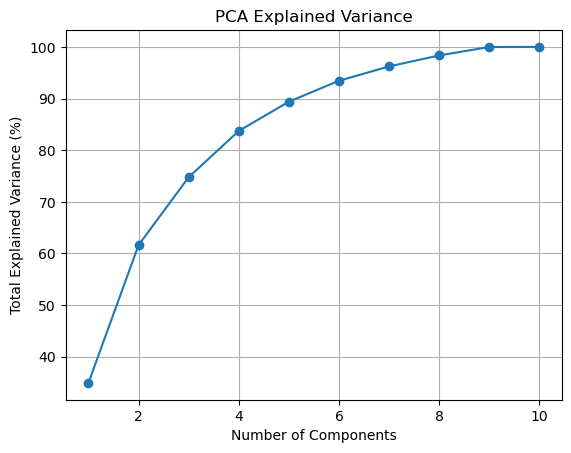

In [6]:
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_)*100, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance (%)')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

In [7]:
pca2 = PCA(n_components=7)
data_post_pca = pca2.fit_transform(data_pre_pca_scaled)
data_post_pca = pd.DataFrame(data_post_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
data_post_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.055076,1.999240,-0.559304,0.189465,0.848461,0.229648,0.691080
1,-1.737984,1.627942,-1.211965,1.100680,0.576241,0.269031,0.171490
2,-0.780658,2.776453,-0.448457,0.961868,0.442974,-0.193895,-0.020612
3,-0.180110,0.812892,-2.017959,-0.127721,-0.382280,-0.405912,-0.009567
4,0.428559,2.258562,-0.080282,-0.631132,-0.344487,-0.784097,-0.170055
...,...,...,...,...,...,...,...
232,-1.771867,1.258599,-1.057145,-0.797019,1.605345,-0.407528,0.277136
233,-1.093020,-0.353789,-2.388277,-0.112291,1.025430,-0.504139,-0.827343
234,-0.046457,1.172415,0.308535,-1.131759,1.183977,-1.208219,-0.387690
235,1.128489,0.743111,0.150008,-0.676593,0.992215,-0.358756,0.581493


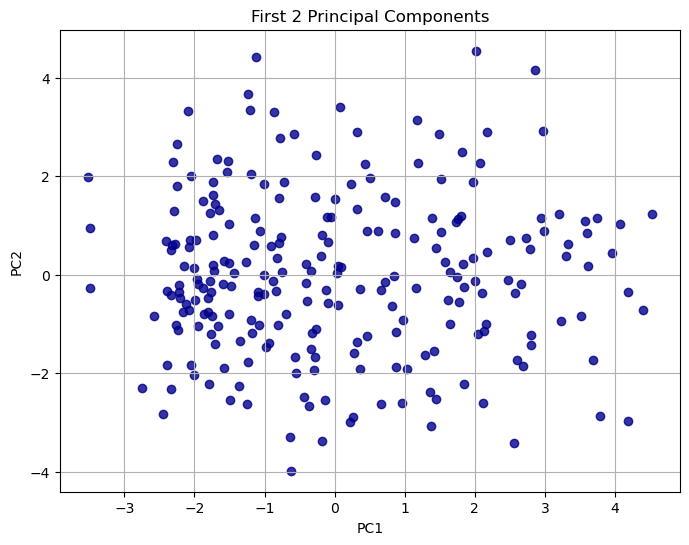

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(data_post_pca['PC1'],data_post_pca['PC2'],color='darkblue',alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 Principal Components')
plt.grid(True)
plt.show()

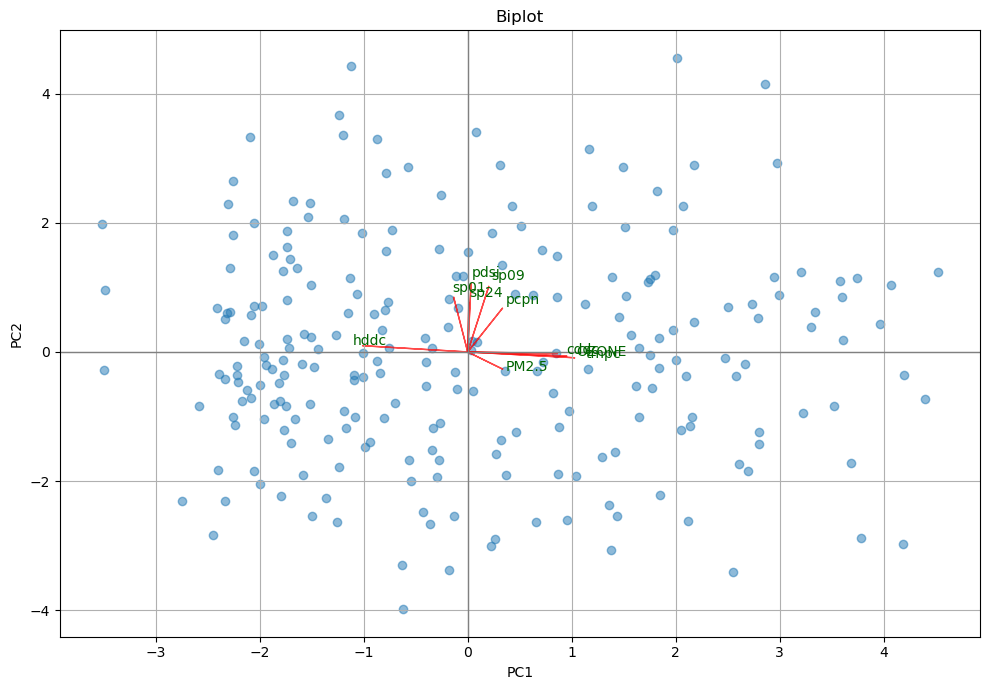

In [11]:
plt.figure(figsize=(10, 7))

plt.scatter(data_post_pca['PC1'], data_post_pca['PC2'], alpha=0.5)

for i, feature in enumerate(data_pre_pca.columns):
    plt.arrow(0,0,pca.components_[0,i]*2,pca.components_[1,i]*2,color='red',alpha=0.7)
    plt.text(pca.components_[0,i]*2.2,pca.components_[1,i]*2.2,feature,color='darkgreen')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')
plt.grid()
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.tight_layout()
plt.show()
